# Equation of State
This uses the [equation of state](https://github.com/dionhaefner/pyhpc-benchmarks/blob/master/benchmarks/equation_of_state/eos_jax.py) from the [`pyhpc`](https://github.com/dionhaefner/pyhpc-benchmarks/) benchmark.

In [1]:
import numpy as np
import sys

from datetime import datetime
from pickle import load

#### Parameter of Benchmarking

In [2]:
repeat, number = 3000, 50

In [3]:
UseGPU = True

if(UseGPU):
    device = 'GPU'
    ToOpen = "runtime_data/EqOfState_GPU__2023-12-14_11-27-6.pickle"
else:
    device = 'CPU'
    ToOpen = "runtime_data/EqOfState_CPU__2023-12-15_6-31-57.pickle"
#
with open(ToOpen, '+br') as F:
    gSizes, resTime_pf, resTime_jax, resTime_sdfg = load(F)
#

In [4]:
resTime_sdfg_min = np.array([r.min()  for r in resTime_sdfg])
resTime_jax_min = np.array([r.min()  for r in resTime_jax])
resTime_pf_min = np.array([r.min()  for r in resTime_pf])

resTime_sdfg_mean = np.array([r.mean()  for r in resTime_sdfg])
resTime_jax_mean = np.array([r.mean()  for r in resTime_jax])
resTime_pf_mean = np.array([r.mean()  for r in resTime_pf])

resTime_sdfg_std = np.array([r.std()  for r in resTime_sdfg])
resTime_jax_std = np.array([r.std()  for r in resTime_jax])
resTime_pf_std = np.array([r.std()  for r in resTime_pf])

In [5]:
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.rcParams["figure.dpi"] = 1000
mpl.rcParams['savefig.bbox'] = 'tight'
#mpl.rcParams['savefig.directory'] = './pic/'
mpl.rcParams['savefig.dpi'] = 'figure'
mpl.rcParams['savefig.edgecolor'] = 'auto'
mpl.rcParams['savefig.facecolor'] = 'auto'
mpl.rcParams['savefig.format'] = 'png'
mpl.rcParams['savefig.orientation'] = 'portrait'
mpl.rcParams['savefig.pad_inches'] = 0.1
mpl.rcParams['savefig.transparent'] = False

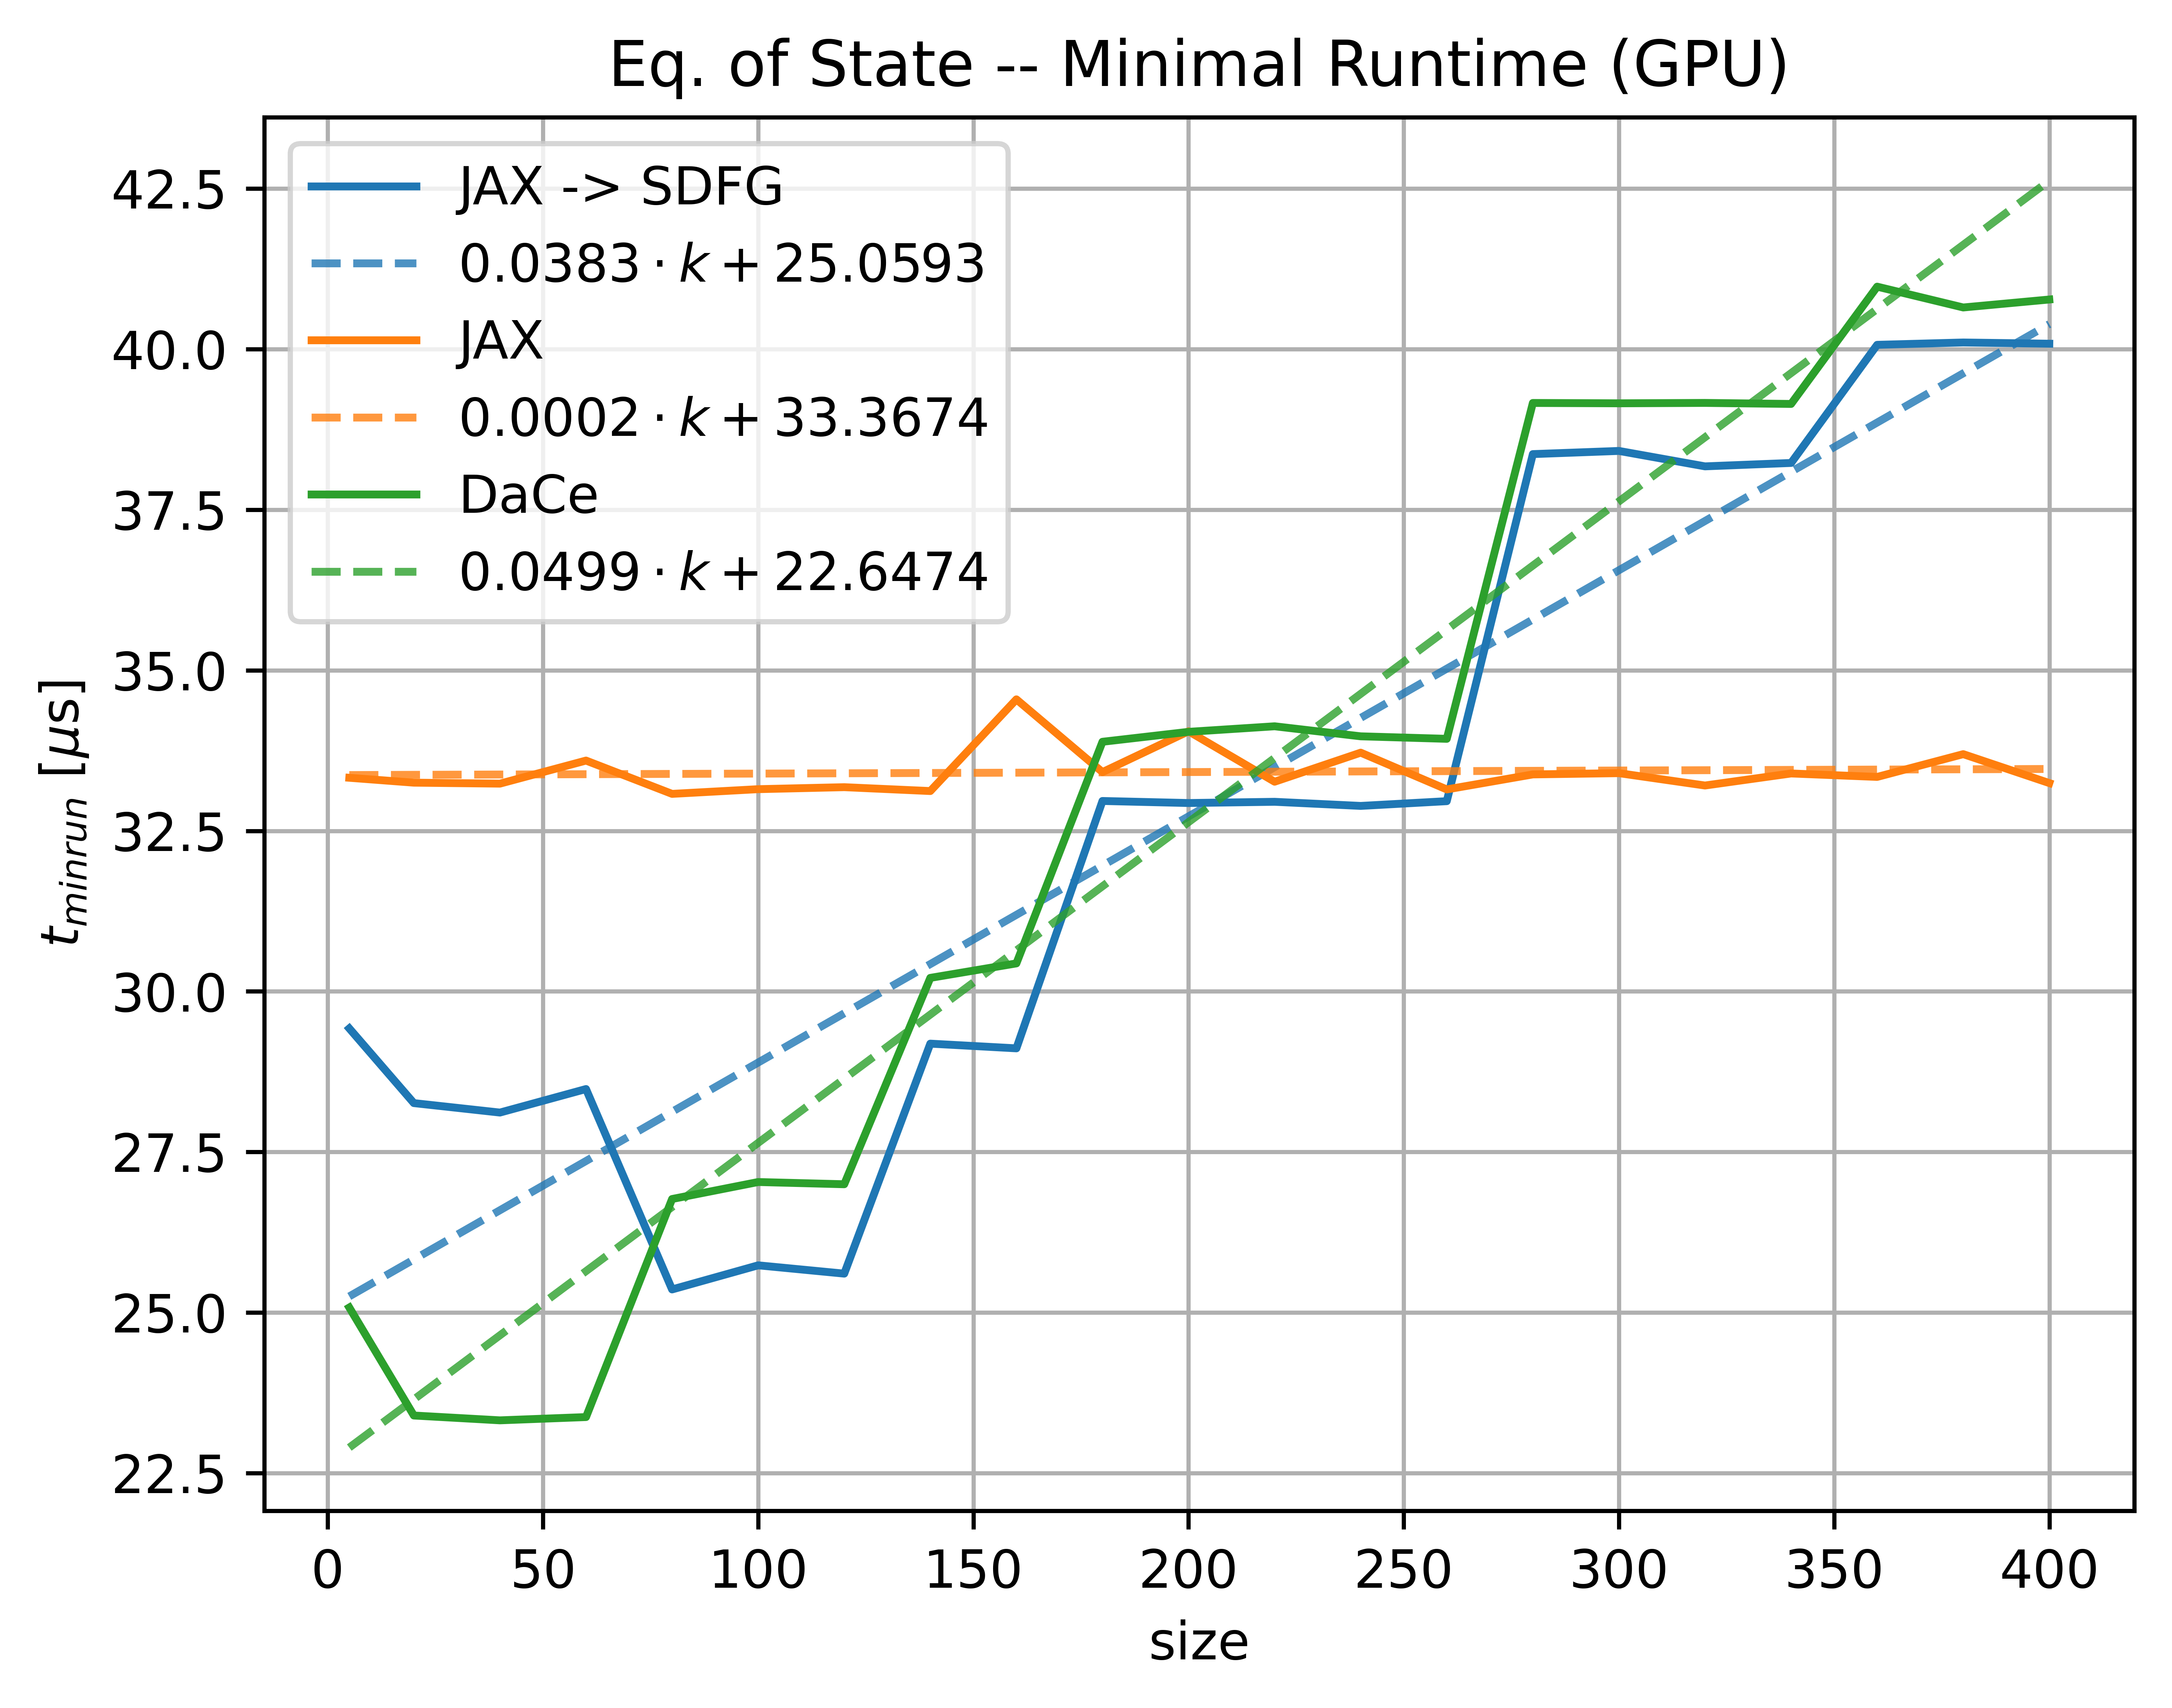

In [6]:
X = np.vstack([gSizes, np.ones_like(gSizes)]).T

for ID, Time in {'JAX -> SDFG':  resTime_sdfg_min,
                 'JAX':          resTime_jax_min,
                 'DaCe':         resTime_pf_min, }.items():
    plt.plot(gSizes, Time * 1000000 / number, label=ID)
    col = plt.gca().lines[-1].get_color()
    
    a, b = np.linalg.lstsq(X, Time * 1000000 / number, rcond=None)[0]

    Times_ = a * np.array(gSizes) + b
    plt.plot(
        gSizes, Times_,
        c=col, linestyle='--', alpha=0.8, 
        label=f'${int(a * 1e4)/1e4} \\cdot k + {int(b * 1e4)/1e4}$',
    )
#


plt.legend()
plt.xlabel('size')
plt.ylabel('$t_{min run}$ [$\\mu$s]')
plt.grid(visible=True)
#plt.yscale('log')

plt.title(f"Eq. of State -- Minimal Runtime ({device})")

plt.savefig(f"EoS_{device}_min_runtime.png")

plt.show()
